# Find the best two markets to advertise in

Assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. 

We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

# Understanding the data

First, we will look at some existing survey data (from freeCodeCamp 2017 New coder survey). freeCodeCamp is a free e-learning platform with fairly strong new coder follower base. Their survey attracts a lot of new coders which is great for our analysis. 

In [1]:
# Loading the data into dataframe
import pandas as pd
new_coder_survey_2017 = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
new_coder_survey_2017.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# List all the column names
list(new_coder_survey_2017.columns)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

In [3]:
# Look at the column names and corresponding data type for each column
new_coder_survey_2017.dtypes

Age                       float64
AttendedBootcamp          float64
BootcampFinish            float64
BootcampLoanYesNo         float64
BootcampName               object
BootcampRecommend         float64
ChildrenNumber            float64
CityPopulation             object
CodeEventConferences      float64
CodeEventDjangoGirls      float64
CodeEventFCC              float64
CodeEventGameJam          float64
CodeEventGirlDev          float64
CodeEventHackathons       float64
CodeEventMeetup           float64
CodeEventNodeSchool       float64
CodeEventNone             float64
CodeEventOther             object
CodeEventRailsBridge      float64
CodeEventRailsGirls       float64
CodeEventStartUpWknd      float64
CodeEventWkdBootcamps     float64
CodeEventWomenCode        float64
CodeEventWorkshops        float64
CommuteTime                object
CountryCitizen             object
CountryLive                object
EmploymentField            object
EmploymentFieldOther       object
EmploymentStat

# Checking for sample representativity

Now, we would like to know some information about the survey population, such as

1) The location of the new coders
2) Which locations have the largest new coder base
3) How much money do new coders want to spend on learning

First, we need to know whether the sample is representatitive enough for the population. 

In [4]:
#Look at the distribution of 'JobRoleInterest' column for each unique answer
new_coder_survey_2017['JobRoleInterest'].value_counts(normalize=True)


Full-Stack Web Developer                                                                                                                                                                                                                                    0.117706
  Front-End Web Developer                                                                                                                                                                                                                                   0.064359
  Data Scientist                                                                                                                                                                                                                                            0.021739
Back-End Web Developer                                                                                                                                                                                                   

Takeaway

People can choose more than one subject as their interest, and most people seem to have interests in more than one subject. 

This sample would still be representatitive if most people are interested in more than one subject. 



In [5]:
# Split JobRoleInterest column by ',' to find the number of roles each respondent has interest in
JobRoleInterest_clean = new_coder_survey_2017['JobRoleInterest'].dropna()
JobRoleInterest_split = JobRoleInterest_clean.str.split(',')
JobRoleInterest_split.head()

1                           [Full-Stack Web Developer]
2    [  Front-End Web Developer,  Back-End Web Deve...
3    [  Front-End Web Developer,  Full-Stack Web De...
4    [Full-Stack Web Developer,  Information Securi...
6                           [Full-Stack Web Developer]
Name: JobRoleInterest, dtype: object

In [6]:
# Now for every respondent, each role of interest is separated by ',', so we just need to see the length of list for each row to figure out how many roles of interests does this respondent has. 
# Then use unique value distribution to see the distribution of number of roles of interest. 

n_of_interests = JobRoleInterest_split.apply(len)
n_of_interests.value_counts(normalize=True)
# We can see that 32% of the respondents showed interest in only one role, while 68% of respondents are interested in more than one role. 

1     0.316505
3     0.158896
4     0.152174
5     0.120423
2     0.108839
6     0.067220
7     0.038616
8     0.017592
9     0.009868
10    0.004720
12    0.003003
11    0.001859
13    0.000286
Name: JobRoleInterest, dtype: float64

In [7]:
new_coder_survey_2017.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Filter "Web" or "Mobile" as key words within 'JobRoleInterest_clean' and see the distribution
filter_bool = JobRoleInterest_clean.str.contains('Web|Mobile', case=False, na=False, regex=True)
web_mobile_dist = filter_bool.value_counts(normalize=True)
web_mobile_dist

True     0.863129
False    0.136871
Name: JobRoleInterest, dtype: float64

In [9]:
#Find the total number of respondents interested in Web or Mobile development
len(JobRoleInterest_clean[filter_bool])

6035

There are 6035 respondents interested in either web or mobile development, accounting for 86% of total non-null respondents. 

([<matplotlib.axis.XTick at 0x7efee775c5c0>,
 <a list of 2 Text xticklabel objects>)

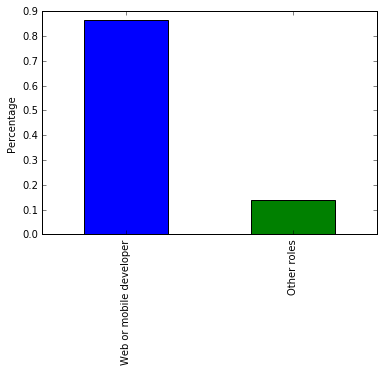

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
web_mobile_dist.plot.bar()
plt.ylabel('Percentage')
plt.xticks([0,1], ['Web or mobile developer', 'Other roles'])

Key takeaway is that 86% (vast majority) of surveyed new coders expressed interests in web or mobile developer roles. It means the focus of this advertising campaign should be web or mobile development, while offering a broader range of classes because 68% of new coders are interested in more than just one role, but multiple possible roles.

# New coders: Locations and Densities

Now we know the sample is a good representative of the population, we can now start analyzing the data. 

First, we will look at the new coders' physical locations. We will work with 'CountryLive' column because we are mainly interested in where the new coders actually live currently. 

In [11]:
# First we make sure to drop the null or NA values under 'JobRoleInterest' column, making sure we only include all the new coders who reported an interest. 
new_coder_survey_2017_clean = new_coder_survey_2017.dropna(subset=['JobRoleInterest'])
new_coder_survey_2017_clean

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,24.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0
11,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,44.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,27.0,1.0,1.0,0.0,Code Fellows,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Then we can look at the distribution of countries for new coders
pct_dist = new_coder_survey_2017_clean['CountryLive'].value_counts(normalize=True)
pct_dist

United States of America         0.457005
India                            0.077216
United Kingdom                   0.046066
Canada                           0.038023
Poland                           0.019158
Brazil                           0.018865
Germany                          0.018280
Australia                        0.016379
Russia                           0.014917
Ukraine                          0.013016
Nigeria                          0.012284
Spain                            0.011261
France                           0.010968
Romania                          0.010383
Netherlands (Holland, Europe)    0.009506
Italy                            0.009067
Philippines                      0.007605
Serbia                           0.007605
Greece                           0.006727
Ireland                          0.006288
South Africa                     0.005703
Mexico                           0.005411
Turkey                           0.005265
Hungary                          0

In [13]:
# also look at the country distribution in absolute value
abs_dist = new_coder_survey_2017_clean['CountryLive'].value_counts()
abs_dist

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Philippines                        52
Serbia                             52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                        33
Croatia     

In [14]:
# Combine two tables 
country_dist = pd.concat([abs_dist, pct_dist], axis=1)
country_dist.columns = ['absolute_number', 'percentage']
country_dist

,absolute_number,percentage
United States of America,3125,0.457005
India,528,0.077216
United Kingdom,315,0.046066
Canada,260,0.038023
Poland,131,0.019158
Brazil,129,0.018865
Germany,125,0.018280
Australia,112,0.016379
Russia,102,0.014917
Ukraine,89,0.013016


Key takeaway:

New coders living in USA accounts for 45.7% of total sample, ranking as No.1 among all surveyed. 

India accounts for 7.7% of total, ranking as the second most important region. 

UK accounts for 4.6% of total, ranking as No.3 region. 

Conclusion is that we should mainly target USA and India to advertise because these two markets account for over half of entire sample. 

However, our analysis cannot stop here, we also need to see how much people spend in online education in each the leading markets. Certain dense markets may have very low peopensity to spend, therefore may alter our conclusion. 

# Spending money for learning

Now we need to look at how much money people are willing to spend on online education, which is represented by 'MoneyForLearning' column. 

For simplicity, only four countries really matter here: USA, India, UK, and Canada. The four countries account for over 60% of the new coder sample. 

Also, since the education product is written in English, it would be logical to include only English speaking countries. 

In [15]:
# First, we need to take 'MoneyForLearning' column and divide it by the 'MonthsProgramming' column to generate money spent per month
new_coder_survey_2017_clean['MonthsProgramming'].replace(0,1, inplace=True)
new_coder_survey_2017_clean['MonthlySpending'] = new_coder_survey_2017_clean['MoneyForLearning'] / new_coder_survey_2017_clean['MonthsProgramming']
new_coder_survey_2017_clean['MonthlySpending'].isnull().sum()
# We can see from results that there are 675 null values, and we will need to drop them. 

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


675

In [16]:
# drop all the rows where MonthlySpending column is a null value. 
new_coder_survey_2017_clean = new_coder_survey_2017_clean.dropna(subset = ['MonthlySpending'])
new_coder_survey_2017_clean['MonthlySpending']

1           13.333333
2          200.000000
3            0.000000
4            0.000000
6            0.000000
9            5.555556
11           0.000000
15           0.000000
16          16.666667
18          35.714286
19          17.857143
21         100.000000
22         285.714286
23         100.000000
28           2.416667
30          66.666667
31           0.000000
32         100.000000
33          83.333333
35           0.000000
40          25.000000
41           0.000000
42          50.000000
43           0.000000
52           0.000000
55           0.000000
58           0.000000
63          16.666667
64          50.000000
66           2.777778
             ...     
18070        0.055556
18071        7.500000
18073       16.666667
18078      500.000000
18080       25.000000
18088      182.000000
18089        0.000000
18090        0.000000
18093       27.777778
18097        0.000000
18098        1.222222
18099     1000.000000
18107      275.000000
18111      200.000000
18112     

In [17]:
# Also need to Remove also any rows that have null values in the CountryLive column
new_coder_survey_2017_clean = new_coder_survey_2017_clean.dropna(subset = ['CountryLive'])
new_coder_survey_2017_clean

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpending
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.000000
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
9,24.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,5.555556
11,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
15,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
16,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.666667
18,46.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.714286


In [18]:
new_coder_survey_2017_clean['CountryLive'].value_counts()


United States of America         2933
India                             463
United Kingdom                    279
Canada                            240
Poland                            122
Germany                           114
Brazil                            111
Australia                         102
Russia                             79
Ukraine                            79
Nigeria                            72
Spain                              66
Romania                            65
France                             62
Netherlands (Holland, Europe)      59
Italy                              52
Serbia                             44
Philippines                        43
Ireland                            41
Greece                             40
South Africa                       36
Mexico                             33
Turkey                             31
New Zealand                        30
Hungary                            30
Norway                             30
Argentina   

In [19]:
# Group the remaining data by the CountryLive column and find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.
mean_by_country = new_coder_survey_2017_clean.groupby('CountryLive').mean()
mean_by_country

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpending
CountryLive,,,,,,,,,,,,,,,,,,,,,
Afghanistan,18.750000,0.000000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.000000
Albania,20.666667,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,7.111111
Algeria,23.750000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.000000
Angola,20.000000,0.000000,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,116.666667
Anguilla,25.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Argentina,26.466667,0.000000,NaN,NaN,NaN,1.166667,1.0,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,55.984444
Australia,28.465347,0.068627,0.142857,0.428571,0.857143,1.714286,1.0,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,419.268452
Austria,26.500000,0.062500,0.000000,0.000000,1.000000,2.000000,1.0,NaN,1.0,NaN,...,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,936.208333
Azerbaijan,27.666667,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,25.555556


In [20]:
mean_by_country['MonthlySpending'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada', 'China']].sort_values(ascending=False)

CountryLive
China                       236.441270
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: MonthlySpending, dtype: float64

Key take:

Top monthly spending by countries are China ($237), USA ($228), India ($135), Canada ($114), UK ($46)

What's surprising is that new coders in China and India spend more than Canada and UK, while China also surpasses USA as No.1 monthly spending group globally. 

# Dealing with Extreme Outliers

We now will look into why India is spending significantly more than Canada and UK, whether it was due to extreme outliers in distributions of India, Canada, and UK. 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


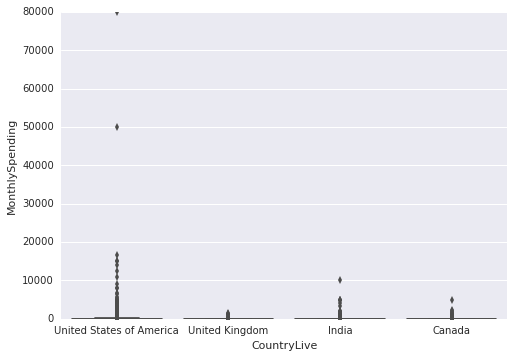

In [21]:
import seaborn as sns
four = new_coder_survey_2017_clean[new_coder_survey_2017_clean['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
sns.boxplot(x = 'CountryLive', y = 'MonthlySpending', data = four)

There seems to be some outliers for USA, India and Canada, not so much in UK. 

In [22]:
# First, eliminate the extreme outliers for USA
four = four[four['MonthlySpending'] < 20000]

In [23]:
# Now, compute the mean again
four.groupby('CountryLive').mean()['MonthlySpending']

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: MonthlySpending, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


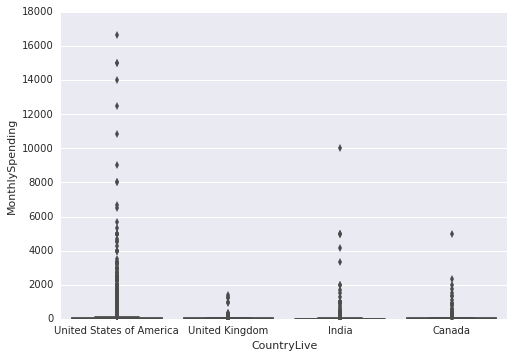

In [24]:
# Also, create the boxplot again
sns.boxplot(x = 'CountryLive', y = 'MonthlySpending', data = four)

Now we can see that there are some outliers for India and Canada, but we need to look at those respondents first before we can determine they are the outliers to be eliminated

In [25]:
# Only select those who spent more than $2500 a month in India
outliers_india = four[(four['CountryLive'] == 'India') & (four['MonthlySpending'] > 2500)]
outliers_india

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpending
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


We found that these respondents haven't attended any bootcamp, and therefore they are likely coders who interpret the questions incorrectly. So we can safely remove them from the dataset. 

In [26]:
new_four = four.drop(outliers_india.index)
new_four

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpending
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
15,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
16,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.666667
18,46.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.714286
19,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.857143
21,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
22,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,285.714286
23,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,100.000000


In [27]:
# Now compute the mean again and see the distribution
new_four.groupby('CountryLive').mean()['MonthlySpending']

CountryLive
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
United States of America    183.800110
Name: MonthlySpending, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


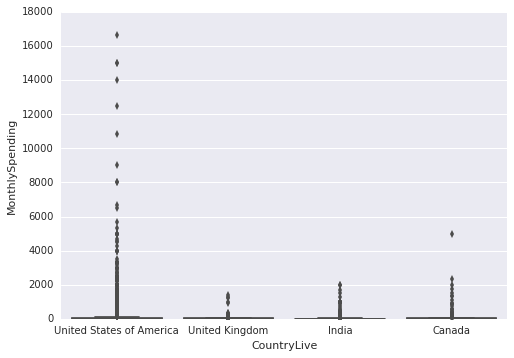

In [28]:
# Draw boxplot for the new data
sns.boxplot(x = 'CountryLive', y = 'MonthlySpending', data = new_four)

In [29]:
# We also need to investigate outliers for Canada and USA
outliers_canada = new_four[(new_four['CountryLive'] == 'Canada') & (new_four['MonthlySpending'] > 4000)]
outliers_canada

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpending
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


We can tell from above data that this respondent was enrolled but never finished, no other information was provided, therefore we should drop it. 

In [30]:
# Drop outlier in Canada
new_four = new_four.drop(outliers_canada.index)

In [31]:
outliers_usa = new_four[(new_four['CountryLive'] == 'United States of America') & (new_four['MonthlySpending'] > 6000)]
outliers_usa

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpending
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


We can see that several outliers have never attended any bootcamp, therefore we should drop those. 

In [35]:
# Identify outliers with no attending record or less than 
outliers_usa_no_attend = new_four[(new_four['CountryLive'] == 'United States of America') & (new_four['MonthlySpending'] > 6000) & (new_four['AttendedBootcamp'] == 0)]
outliers_usa_less_than_three_month = new_four[(new_four['CountryLive'] == 'United States of America') & (new_four['MonthlySpending'] > 6000) & (new_four['MonthsProgramming'] <= 3)]

In [36]:
new_four = new_four.drop(outliers_usa_no_attend.index)
new_four = new_four.drop(outliers_usa_less_than_three_month.index)
new_four

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpending
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
15,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
16,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.666667
18,46.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.714286
19,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.857143
21,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
22,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,285.714286
23,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,100.000000


In [37]:
# New calculate the mean distribution again
new_four.groupby('CountryLive').mean()['MonthlySpending']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MonthlySpending, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


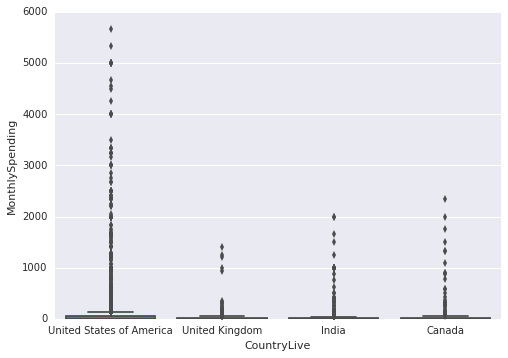

In [38]:
sns.boxplot(x = 'CountryLive', y = 'MonthlySpending', data = new_four)

In [39]:
# Now also look at the coder population by country
new_four['CountryLive'].value_counts()

United States of America    2920
India                        457
United Kingdom               279
Canada                       239
Name: CountryLive, dtype: int64

From monthly spending perspective, Canada would be an ideal second market to advertise in because it offers a higher monthly spending potential than India ($93 vs. $65)

However, from size of the coder base perspective, India is nearly twice the size of Canada in total new coder population. 

In conclusion, we can either invest in USA and India (70% USA and 30% India), or invest in USA and Canada (70% USA and 30% Canada). If we are looking for geographic diversity, we should pursue India as a second market, but if we are looking to focus on North America market before expanding into new locations, we should focus on USA and Canada. 